In [ ]:
print("hello World")

hello World


In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)


PyTorch version: 2.9.0+cpu
Torchvision version: 0.24.0+cpu


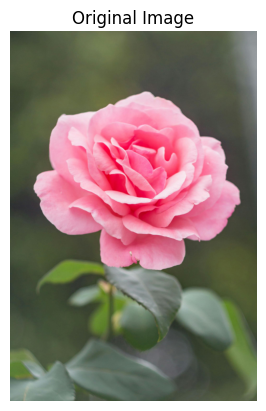

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/flower1.jpg")

plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()


In [ ]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img)

print("Tensor shape:", img_tensor.shape)
print("Min value:", img_tensor.min())
print("Max value:", img_tensor.max())



Tensor shape: torch.Size([3, 2829, 1886])
Min value: tensor(0.)
Max value: tensor(1.)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

img_tensor_resized = transform(img)
print("Resized tensor shape:", img_tensor_resized.shape)
print("Min value:", img_tensor_resized.min())
print("Max value:", img_tensor_resized.max())


Resized tensor shape: torch.Size([3, 224, 224])
Min value: tensor(0.)
Max value: tensor(1.)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

img_tensor_norm = transform(img)
print("Normalized tensor shape:", img_tensor_norm.shape)
print("Min value:", img_tensor_norm.min())
print("Max value:", img_tensor_norm.max())


Normalized tensor shape: torch.Size([3, 224, 224])
Min value: tensor(-2.0357)
Max value: tensor(2.3611)


In [18]:
import torch

img = torch.zeros((5, 5))

img[2, :] = 1

print(img)


tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [19]:
shuffled = img.flatten()
shuffled = shuffled[torch.randperm(shuffled.numel())]
shuffled = shuffled.reshape(5, 5)

print(shuffled)


tensor([[0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0.]])


In [1]:
import torch
import torch.nn as nn

image = torch.tensor([[
    [0,0,0,0,0],
    [0,0,0,0,0],
    [1,1,1,1,1],
    [0,0,0,0,0],
    [0,0,0,0,0]
]], dtype=torch.float32)

image = image.unsqueeze(0)
print("Image shape:", image.shape)


Image shape: torch.Size([1, 1, 5, 5])


APPLY CONVOLUTION

In [3]:
conv = nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    bias=False
)

conv.weight.data = torch.tensor([[
    [[-1., -1., -1.],
     [ 0.,  0.,  0.],
     [ 1.,  1.,  1.]]
]])


output = conv(image)
print(output)


tensor([[[[ 3.,  3.,  3.],
          [ 0.,  0.,  0.],
          [-3., -3., -3.]]]], grad_fn=<ConvolutionBackward0>)
